### Visual and check icesat2 data on the study region.

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import warnings
warnings.filterwarnings('ignore')


In [2]:
path_hma_vec = 'data/boundary/hma_bolch2019.gpkg'
path_setp_vec = 'data/boundary/setp_zhao2022.gpkg'
path_atl06 = 'data/icesat-2/ATL06-2020/tile-30-95/processed_ATL06_20200221213108_08730606_005_01.h5'
path_atl06_tile = 'data/icesat-2/ATL06-2020/tile-30-95/data_readout_merge_subs.h5'


### Read 1 icesat-2 ATL06 data

In [3]:
!h5ls $path_atl06/gt2l/land_ice_segments/latitude


latitude                 Dataset {2998/Inf}


In [4]:
keys = ['lon', 'lat', 'h', 't_dyr']   ## output variables
atl06 = {}
for key in keys: 
    atl06[key]=np.array([]); 
with h5py.File(path_atl06,'r') as f_atl06:
    atl06['lon'] = f_atl06['gt2l/land_ice_segments/longitude'][:]
    atl06['lat'] = f_atl06['gt2l/land_ice_segments/latitude'][:]
    atl06['h'] = f_atl06['gt2l/land_ice_segments/h_li'][:]
    

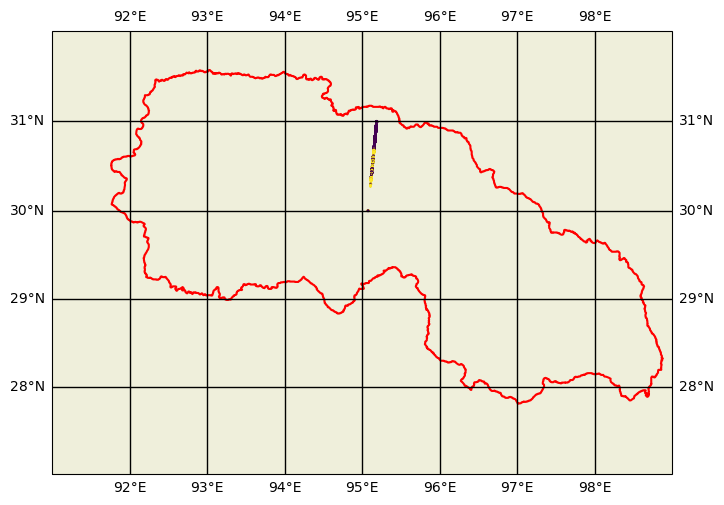

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([91, 99, 27.0, 32.0])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=1, alpha=1, zorder=1, color='black')
## 1. setp boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                          crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 2. icesat-1 data
ax.scatter(x=atl06['lon'], y=atl06['lat'], c=atl06['h'], s=1, transform=ccrs.PlateCarree(), zorder=0)



### Read 1-tile icesat-2 atl06 data

In [6]:
!h5ls $path_atl06_tile


beam_type                Dataset {181647}
cycle                    Dataset {181647}
h                        Dataset {181647}
lat                      Dataset {181647}
lon                      Dataset {181647}
orbit_type               Dataset {181647}
rgt                      Dataset {181647}
spot                     Dataset {181647}
t_dyr                    Dataset {181647}


In [7]:
### read merged 1-tile icesat-1 data
keys = ['lon', 'lat', 'h', 't_dyr']   ## output variables
atl06_tile = {}
for key in keys: 
    atl06_tile[key]=np.array([]); 
with h5py.File(path_atl06_tile,'r') as f_atl06:
    atl06_tile['lon'] = f_atl06['lon'][:]
    atl06_tile['lat'] = f_atl06['lat'][:]
    atl06_tile['h'] = f_atl06['h'][:]
    atl06_tile['t_dyr'] = f_atl06['t_dyr'][:]


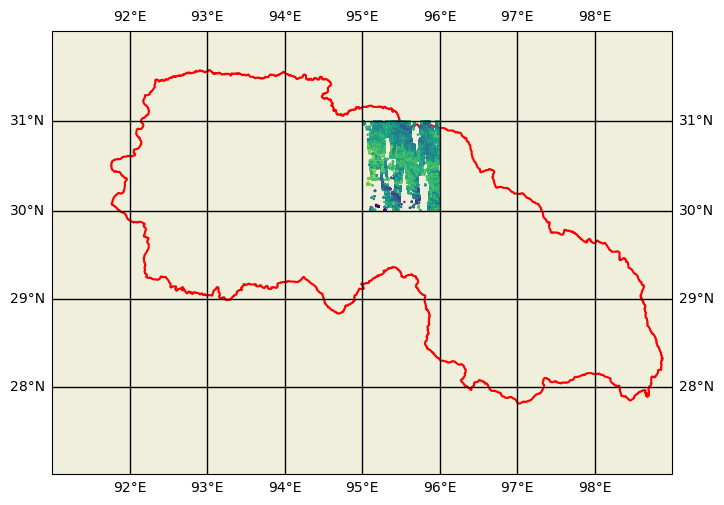

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([91, 99, 27.0, 32.0])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=1, alpha=1, zorder=1, color='black')
## 1. setp boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 2. icesat-2 data
ax.scatter(x=atl06_tile['lon'], y=atl06_tile['lat'], c=atl06_tile['h'], \
                                        s=0.5, transform=ccrs.PlateCarree(), zorder=0)

